# Route for cargo bike

Task 1: Download OSM for Würzburg

In [1]:
# !pip install geopandas

In [2]:
import geopandas as gpd
import osmnx as ox
import random
import networkx as nx

C:\Users\agnes\anaconda3\lib\site-packages\geopandas\_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\agnes\AppData\Local\Temp\ipykernel_1216\1310112817.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you ar

                                            geometry  bbox_north  bbox_south  \
0  POLYGON ((9.87163 49.79715, 9.87167 49.79702, ...   49.845462   49.710684   

   bbox_east  bbox_west   place_id  osm_type  osm_id        lat       lon  \
0  10.014429   9.871628  109313294  relation   62464  49.793372  9.930978   

      class            type  place_rank  importance addresstype      name  \
0  boundary  administrative          12    0.619286        city  Würzburg   

                 display_name  
0  Würzburg, Bavaria, Germany  


<Axes: >

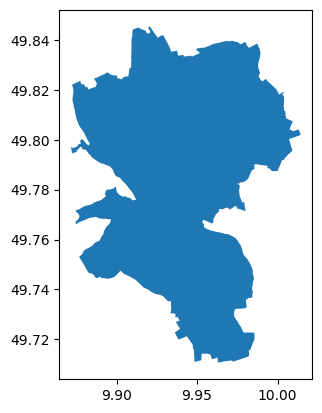

In [3]:
# Specify the name that is used to seach for the data
place_name = "Wuerzburg"

# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)
print(area)
area.plot()



Task 2: OSMNX: bike street network from Würzburg

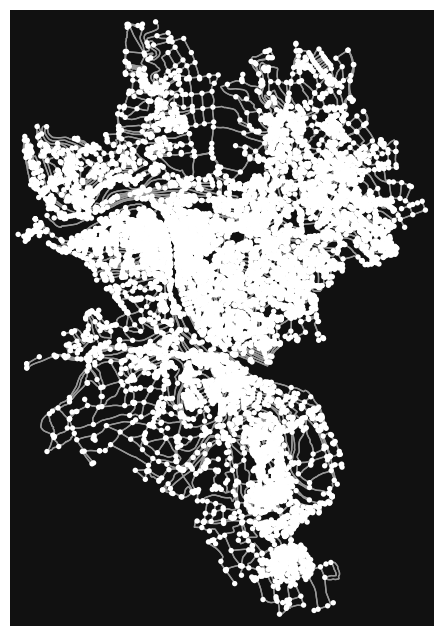

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
G = ox.graph_from_place('Wuerzburg, Germany', network_type='bike')
ox.plot_graph(G)

In [5]:
ox.save_graph_shapefile(G, filepath='C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/data/vector/osm_bike_wue.shp')

ox.save_graph_geopackage(G, filepath='C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/data/vector/osm_bike_wue.gpkg')

C:\Users\agnes\AppData\Local\Temp\ipykernel_1216\2010107594.py:1: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  ox.save_graph_shapefile(G, filepath='C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/data/vector/osm_bike_wue.shp')
C:\Users\agnes\anaconda3\lib\site-packages\osmnx\io.py:117: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


Task 3: Create Route between two random nodes 

In [6]:
random_nodes = random.sample(list(G.nodes()), 2)
start_node = random_nodes[0]
end_node = random_nodes[1]

In [7]:
start_node

1027994911

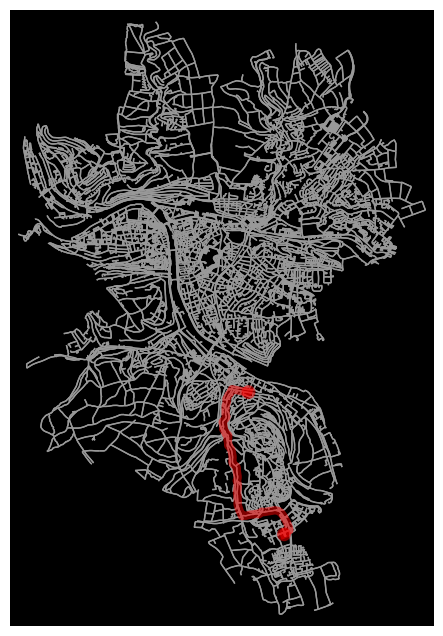

In [8]:
route = nx.shortest_path(G, start_node, end_node)
fig, ax = ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k')                              

### Urban Atlas Data

In [9]:
import geopandas as gpd
import shapely
from shapely.geometry import Polygon
import geopandas as gpd
import networkx as nx
import pyproj
from pyproj import CRS


In [10]:
# Load gpkg file of Wuerzburg Lade die GeoPackage-Datei mit dem Umriss von Würzburg
wuerzburg_UA_gpkg = "C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/data/vector/UA_Wue_clipped_dissolved_AREA_POP.gpkg"
osm_bike_wue_nodes = "C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/data/vector/osm_bike_wue.shp/nodes.shp"
osm_bike_wue_edges = "C:/Users/agnes/Documents/EAGLE/Innovative_Sensors/data/vector/osm_bike_wue.shp/edges.shp"

wuerzburg_UA = gpd.read_file(wuerzburg_UA_gpkg)
osm_bike_wue_nodes = gpd.read_file(osm_bike_wue_nodes)
osm_bike_wue_edges = gpd.read_file(osm_bike_wue_edges)

# Define crs
crs = CRS.from_epsg(4326)

# Reprojection
wuerzburg_UA = wuerzburg_UA.to_crs(crs)
osm_bike_wue_nodes = osm_bike_wue_nodes.to_crs(crs)
osm_bike_wue_edges = osm_bike_wue_edges.to_crs(crs)

print("CRS after Reprojection for wuerzburg_UA:", wuerzburg_UA.crs)
print("CRS after Reprojection for osm_bike_wue_nodes:", osm_bike_wue_nodes.crs)
print("CRS after Reprojection for osm_bike_wue_edges:", osm_bike_wue_edges.crs)


CRS after Reprojection for wuerzburg_UA: EPSG:4326
CRS after Reprojection for osm_bike_wue_nodes: EPSG:4326
CRS after Reprojection for osm_bike_wue_edges: EPSG:4326


<Axes: >

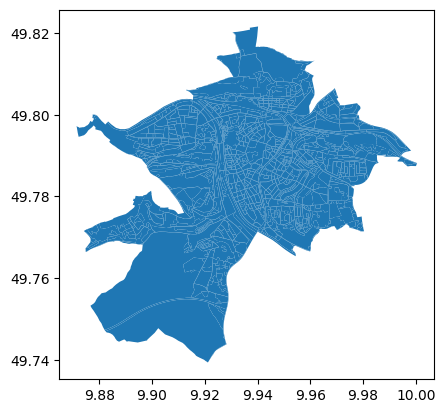

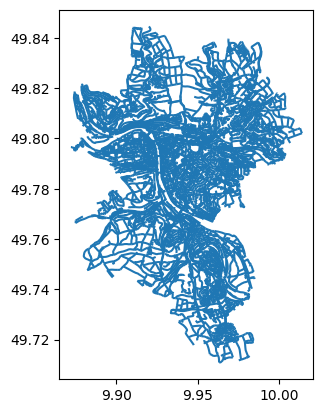

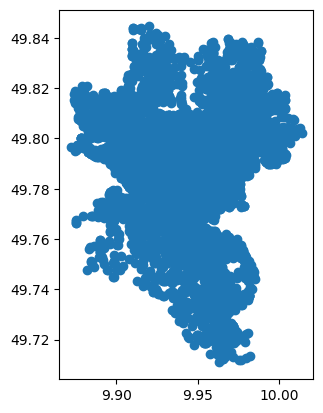

In [11]:
wuerzburg_UA.plot()
osm_bike_wue_edges.plot()
osm_bike_wue_nodes.plot()

<Axes: >

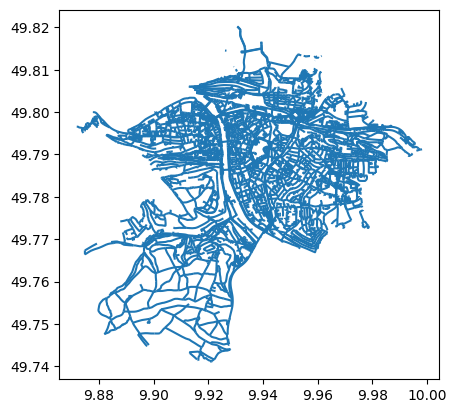

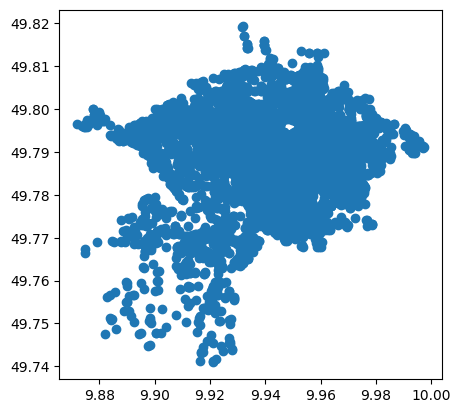

In [12]:
osm_bike_wue_edges_clip = gpd.clip(osm_bike_wue_edges, wuerzburg_UA)
osm_bike_wue_nodes_clip = gpd.clip(osm_bike_wue_nodes, wuerzburg_UA)
osm_bike_wue_edges_clip.plot()
osm_bike_wue_nodes_clip.plot()

In [13]:
# Add a temporary geometry column for the nodes dataset
osm_bike_wue_nodes_clip['temp_geometry'] = osm_bike_wue_nodes_clip.geometry

# Perform a spatial join to add the class information
joined_data = gpd.sjoin(osm_bike_wue_nodes_clip, wuerzburg_UA, how="left", op='within')

# Remove the temporary geometry column
joined_data.drop(columns=['temp_geometry'], inplace=True)

# Check the columns in the combined dataset
print(joined_data.columns)

C:\Users\agnes\anaconda3\lib\site-packages\geopandas\geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\agnes\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


Index(['osmid', 'y', 'x', 'street_cou', 'highway', 'ref', 'geometry',
       'index_right', 'country', 'fua_name', 'fua_code', 'code_2018',
       'class_2018', 'prod_date', 'identifier', 'area_class', 'POP_2018'],
      dtype='object')


Create stops in between

In [14]:
import random
import pandas as pd

# Group the nodes based on their classes
classes_nodes = {}
for index, row in joined_data.iterrows():
    node = row['osmid']
    class_ = row['code_2018']
    if class_ not in classes_nodes:
        classes_nodes[class_] = []
    classes_nodes[class_].append(node)

# Select one node from each class
selected_nodes = []
for nodes_list in classes_nodes.values():
    selected_node = random.choice(nodes_list)
    selected_nodes.append(selected_node)

stops = selected_nodes
print("Selected Nodes:", stops)

Selected Nodes: [265893258, 3274777262, 4815329343, 6298885336, 7581309566, 2493758333, 253517144, 778439151, 40824142, 4170362873, 9829123716, 1966303051, 2421975208, 316729053, 2620982248, 2312176556, 1741561091, 119790709, 689249230, 9820749558, 1690864063]


In [18]:
joined_data

,osmid,y,x,street_cou,highway,ref,geometry,index_right,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,area_class,POP_2018
4079,332304564,49.788311,9.985148,3,NaN,NaN,POINT (9.98515 49.78831),15,DE,Würzburg,DE524L2,12220,Other roads and associated land,2020-06,11594-DE524L2,1.936913e+06,0
11117,7942528318,49.788693,9.982479,2,NaN,NaN,POINT (9.98248 49.78869),4,DE,Würzburg,DE524L2,21000,Arable land (annual crops),2020-06,16210-DE524L2,3.985230e+06,788
11467,8350251988,49.788941,9.981731,2,NaN,NaN,POINT (9.98173 49.78894),9,DE,Würzburg,DE524L2,12100,"Industrial, commercial, public, military and p...",2020-06,10041-DE524L2,4.541105e+06,2211
12737,10914147805,49.788959,9.985309,3,NaN,NaN,POINT (9.98531 49.78896),9,DE,Würzburg,DE524L2,12100,"Industrial, commercial, public, military and p...",2020-06,10041-DE524L2,4.541105e+06,2211
12736,10914141202,49.789089,9.984628,3,NaN,NaN,POINT (9.98463 49.78909),9,DE,Würzburg,DE524L2,12100,"Industrial, commercial, public, military and p...",2020-06,10041-DE524L2,4.541105e+06,2211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,6881208773,49.808959,9.939368,3,NaN,NaN,POINT (9.93937 49.80896),4,DE,Würzburg,DE524L2,21000,Arable land (annual crops),2020-06,16210-DE524L2,3.985230e+06,788
3809,316730808,49.809641,9.938573,3,NaN,NaN,POINT (9.93857 49.80964),4,DE,Würzburg,DE524L2,21000,Arable land (annual crops),2020-06,16210-DE524L2,3.985230e+06,788
3805,316730777,49.809758,9.938561,3,NaN,NaN,POINT (9.93856 49.80976),4,DE,Würzburg,DE524L2,21000,Arable land (annual crops),2020-06,16210-DE524L2,3.985230e+06,788
3969,318805667,49.815937,9.939384,3,NaN,NaN,POINT (9.93938 49.81594),4,DE,Würzburg,DE524L2,21000,Arable land (annual crops),2020-06,16210-DE524L2,3.985230e+06,788


In [19]:
start_node = stops[0]
end_node = stops[-1]
stops = stops[1:-1]

print(start_node, end_node, stops)


4815329343 689249230 [6298885336, 7581309566, 2493758333, 253517144, 778439151, 40824142, 4170362873, 9829123716, 1966303051, 2421975208, 316729053, 2620982248, 2312176556, 1741561091, 119790709]
